In [4]:
%matplotlib inline

from lightjob.db import DB, SUCCESS, RUNNING
import pandas as pd
from scipy.stats import skew
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [5]:
filename = '../feature_generation_remote/.lightjob/'

In [6]:
db = DB()
db.load(filename)

In [39]:
def get_stat(j):
    return 1 - jref['content']['model_params']['wta_lifetime_perc']
    #return j['content']['contractive_coef']

#stat_label = 'Contractive coef'
stat_label = 'Sparsity'

In [41]:
where = 'jobset7'

In [42]:
stats = defaultdict(list)
for j in db.jobs_with(state=SUCCESS, type='generation'):
    content = j['content']
    s = content['model_summary']
    jref = db.get_job_by_summary(s)
    if jref['where'] != where:
        continue
    if "stats" not in j:
        continue
    #v = 1 - jref['content']['model_params']['wta_lifetime_perc']
    v = get_stat(jref)
    stats['stat'].append(v)
    
    d = j['stats']
    for k, v in d.items():
        stats[k].append(v)

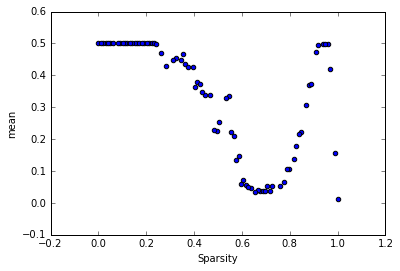

In [43]:
plt.scatter(stats['stat'], np.array(stats['mean']))
plt.xlabel(stat_label)
plt.ylabel('mean')
plt.savefig('mean.png')

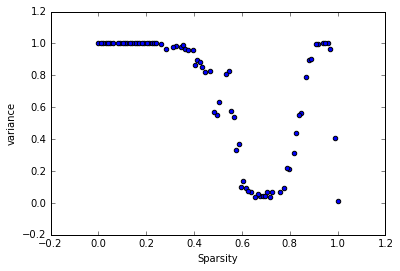

In [44]:
#maxvar = ((10000 - 1 + 1)**2 - 1) / 12 # variance of max entropy distribution (discrete uniform between 1 and 10000) of the discrete distrib : 
# https://en.wikipedia.org/wiki/Uniform_distribution_(discrete)
plt.scatter(stats['stat'], np.array(stats['var']))
plt.xlabel(stat_label)
plt.ylabel('variance')
plt.savefig('variance.png')

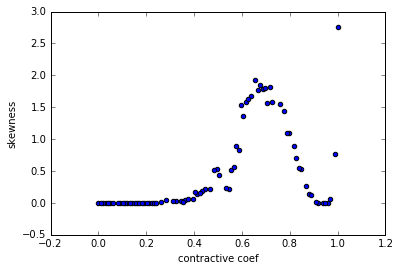

In [45]:
plt.scatter(stats['stat'], np.array(stats['skew']))
plt.xlabel('contractive coef')
plt.ylabel('skewness')
plt.savefig('skewness.png')

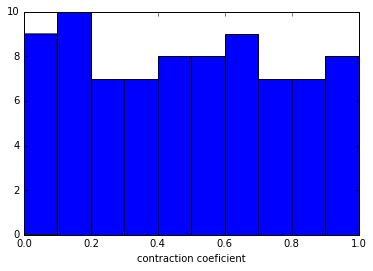

In [46]:
plt.hist(stats['stat'])
plt.xlabel('contraction coeficient')

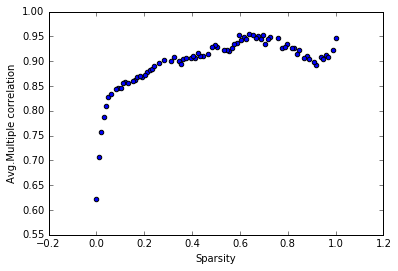

In [47]:
plt.scatter(stats['stat'], stats['multiplecorrelation'])
plt.xlabel(stat_label)
plt.ylabel('Avg.Multiple correlation')
plt.savefig('corr.png')

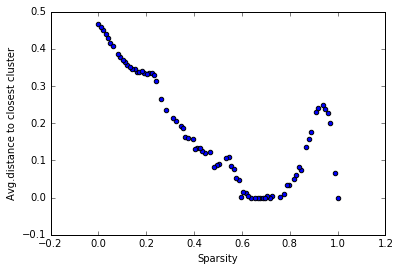

In [48]:
#maxdist = np.sqrt(784) # we have binary images, so euclidean dist between full zero vector minus full one vector
plt.scatter(stats['stat'], stats['clusdiversity'])
#plt.xlabel('contractive coef')
plt.xlabel(stat_label)
plt.ylabel('Avg.distance to closest cluster')
plt.savefig('clus.png')